As mentioned in [our notebook on Principal Component Analysis](https://napsterinblue.github.io/notes/stats/techniques/pca/), the chief goal of a dimension reduction technique is to express the observations of our `p`-dimensional dataset, `X` as a linear combination of `m`-dimensional vectors (`m < p`), `Z`, using a mapping optimized "to explain the most variation in our data."

But whereas PCA is an unsupervised method that involves figuring out how to explain variation in `X`, the Partial Least Squares method introduces a *supervised* alternative and considers our target, `Y`, in the dimension reduction.

Or to quote ISL:

> Roughly speaking, the PLS approach attempts to find directions that help explain both the response and the predictors.

## Intuition

Recall that the general idea of PCA is to:

- Find an axis that explains the most variation in `X`
- Re-orient our data relative to this new axis
- Repeat until we reach some desired "explained variation" threshold

PLS follows a similar approach, but instead begins with basically a Least Squares regression on `Y`

After we normalize our data, the algorithm can be described as thefollowing (borrowed from [this Stanford lecture](https://web.stanford.edu/class/stats202/content/lec15.pdf)):



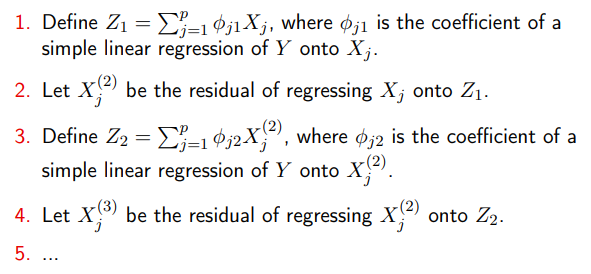

In [1]:
from IPython.display import Image

Image('images/pls_alg.PNG')

Decrypting this a bit, we start by taking a linear regression on `y` to get our coefficients `theta_j1`.

We use this to transform `X_j` into `y_hat = Z_1`-- our prediction vector-- by taking a linear combination. As with any regression, we expect to see a bunch of residual prediction errors between `y_hat` and `y`.

Flipping this, `X_j^(2)` will represent the "missing information" that we have for trying to predict our original `X_j` values using our new mapping `Z_1`.

At this point, we want to continue in the PCA fashion of "find the axis that explains *the next-most variance*." If we use these "missing information residuals", `X_j^(2)` to try and predict `y`, we have a new set of coefficients `theta_j2` that combine with `X_j^(2)` to make our second mapping, `Z_2`.

We continue in this fashion, using the residuals of "missing information" to mine more axes 

## Multivariate `Y`

One important feature of PLS worth mentioning is that it allows us to not only include `Y` in our dimension reduction scheme, it also neatly extends to *mutivariate* dimensions of `Y`.

In a sense, you can conceptualize this as doing a sort of PCA on both `X` and `Y`, then searching for the latent structure of `X` best explains the latent structure of `Y`.

[This video](https://www.youtube.com/watch?v=WKEGhyFx0Dg) does a good job highlighting the idea, visually

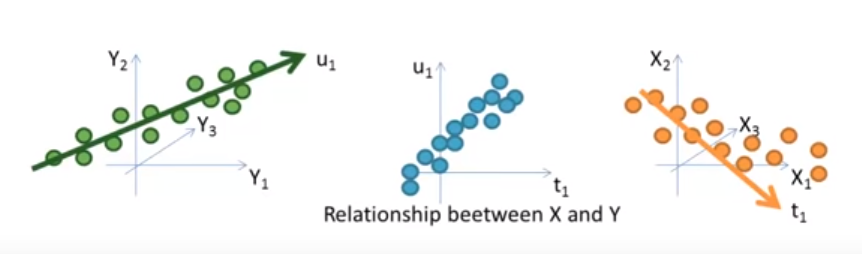

In [2]:
Image('images/pls_multivariate.PNG')

To put this another way, if we can find some representation `U` in `Y` that explains most of the variation in our target space, then `T`, our representation of `X`, will be optimized to maximize the correlation between `U` and `T`, as described in [this video](https://www.youtube.com/watch?v=AxmqUKYeD-U)

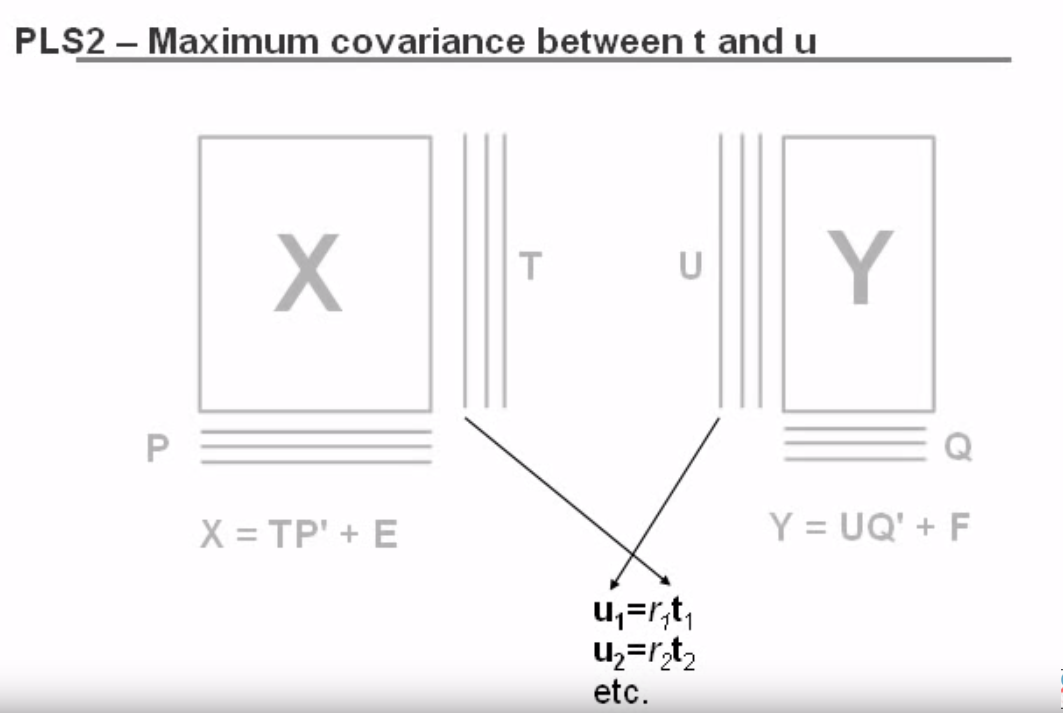

In [3]:
Image('images/pls_multivariate_cross.PNG')

Finally, [the first 2 minutes of this video](https://www.youtube.com/watch?v=Qt3Vv5KsnpA) do an *exceptional job* illustrating the incremental, simultaneous fitting of `T` and `U` and should be watched in excess of 100 times, IMO.